In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
# load dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
columns= ['buying','maint','doors','persons','lug_boot','safety','classes']

# Assign names to Columns
df.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
#to see dimensions of data frame
df.shape

(1727, 7)

In [4]:
#creating labelEncoder and seprating dataset in to X and Y
le = preprocessing.LabelEncoder()
data=df.values
X=data[:,0:6]
Y=data[:,6]
for i in range(6):
  X[:,i]=le.fit_transform(X[:,i])
Y=le.fit_transform(Y)
print(X)
print(Y)

[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]
[2 2 2 ... 2 1 3]


In [59]:
# Split Data to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [63]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier( criterion = "gini", splitter='random', max_depth=8)
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [64]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)

In [65]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8583815028901735


[Text(0.4375, 0.9166666666666666, 'X[3] <= 0.274\nentropy = 1.198\nsamples = 1295\nvalue = [273, 53, 918, 51]'),
 Text(0.3875, 0.75, 'entropy = 0.0\nsamples = 445\nvalue = [0, 0, 445, 0]'),
 Text(0.4875, 0.75, 'X[5] <= 1.472\nentropy = 1.49\nsamples = 850\nvalue = [273, 53, 473, 51]'),
 Text(0.25, 0.5833333333333334, 'X[5] <= 0.363\nentropy = 1.445\nsamples = 556\nvalue = [143, 23, 339, 51]'),
 Text(0.2, 0.4166666666666667, 'X[0] <= 2.21\nentropy = 1.716\nsamples = 276\nvalue = [143, 23, 59, 51]'),
 Text(0.1, 0.25, 'X[0] <= 0.343\nentropy = 1.68\nsamples = 209\nvalue = [112, 23, 23, 51]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.83\nsamples = 61\nvalue = [45, 0, 16, 0]'),
 Text(0.15, 0.08333333333333333, 'entropy = 1.673\nsamples = 148\nvalue = [67, 23, 7, 51]'),
 Text(0.3, 0.25, 'X[1] <= 2.034\nentropy = 0.996\nsamples = 67\nvalue = [31, 0, 36, 0]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.979\nsamples = 53\nvalue = [31, 0, 22, 0]'),
 Text(0.35, 0.08333333333333333, 'entro

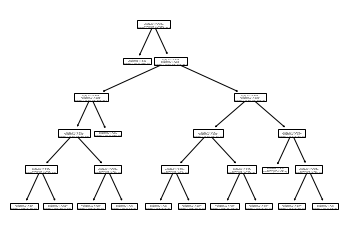

In [37]:
from sklearn import tree
tree.plot_tree(dtree)

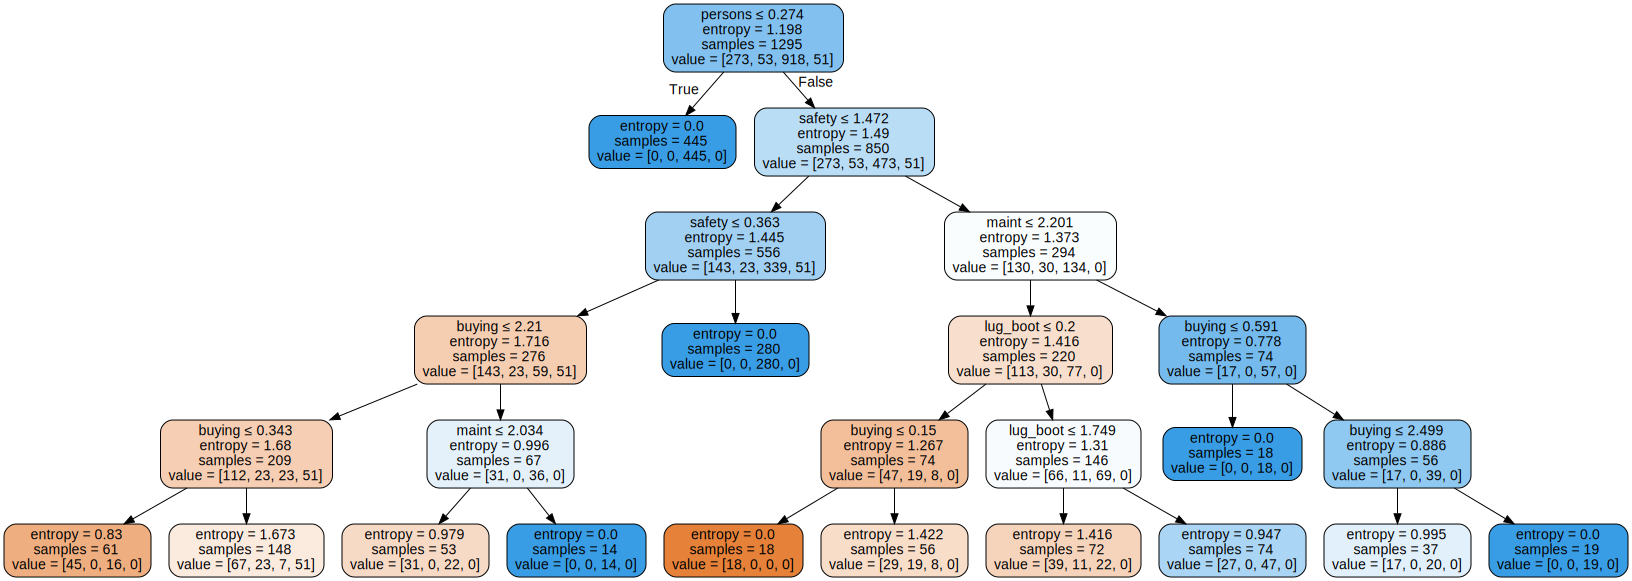

In [38]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("car")
dot_data = tree.export_graphviz(dtree, out_file=None, 
                      feature_names=[ 'buying','maint','doors','persons','lug_boot','safety'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 